# Predicting heart disease using machine learning(Logistic Regression)

- This notebook looks into various machine learning library using Python and data science libraries in an attempt to build a machine learning model. Predicting whether a person has heart disease or not based on their medical attributes.

# 1. Problem Statement
- Predicting whether a person has heart disease or not based on their medical attributes?.

# 2. Data
- The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
- it is available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Attribute Information:-
- Age: The data consists a sample of people between age 28 and 77.
- Sex: Both gender have been included in this data set. Later for analysis, Females have been assigned value ‘0’ and males have been assigned value ‘1’.
- ChestPainType: There are four types of chest pain: Typical Angina (TA), Atypical Angina (ATA), Non-Anginal Pain (NAP), Asymptomatic(ASY)
- RestingBP: Resting blood pressure (in mm Hg).
- Cholestoral: The person’s cholesterol measurement in mg/dl.
- FastingBS: A person’s fasting blood sugar level (if ‘< 120 mg/dl’ then ‘0’ or ‘> 120 mg/dl’).
- RestingECG: Resting Electrocardiographic measurement (0  = normal, 1 = having ST-T wave abnormality [ST], 2 = showing probable or definite left ventricular hypertrophy [LVH]).
- MaxHR: A person’s maximum heart rate achieved.
- ExerciseAngina: Exercise induced angina (No = 0, Yes = 1).
- Oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot).
- ST_Slope: The slope of the peak exercise ST segment (1 = Up-sloping, 2 = Flat, 3 = Down-sloping).
- HeartDisease: Does a person has heart disease (No = 0, Yes = 1).

# Set Working Directory

In [1]:
import os 
os.chdir("C:\\Users\\Ashishkumar Rana\\Desktop\\Data Science\\Project\\Predicting heart disease using machine learning Logistic Regression") # Change working directory
os.getcwd() # get the current working directory

'C:\\Users\\Ashishkumar Rana\\Desktop\\Data Science\\Project\\Predicting heart disease using machine learning Logistic Regression'

# Import Required Library

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split # To partion the data
from sklearn.linear_model import LogisticRegression # Library for Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix # Importing performance matrix, accuracy score and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Ignore warning message

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import data set in to Python

In [4]:
data = pd.read_csv("heart.csv")

In [5]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Creating a Copy of Orginal data 

In [6]:
df = data.copy() # Creating a copy of original data set so that our original data will not have any impact when we made any changes in updates file

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory data analysis.
 -  Know about data.
 -  Data Preprocessing(Deal with missing values)
 -  Cross table and data visualization

# Data Pre-Processing

In [8]:
df.head() # To see first Five row of the data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [10]:
df.shape

(918, 12)

In [11]:
df.size

11016

# Let's Know more about data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- There is no missing values present in our data sets.
- Age, RestingBp, Cholesterol, FastingBS, MaxHR and HeartDisease are of Integer data type.
- Sex, ChestPainType, RestingECG , ExerciseAngina,  ST_Slope and Oldpeak are of Object and float data  type respectively.

# To check missing value in data if any

In [13]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Since we dont have any missing value in data set 

# To check duplicate value if  any

In [15]:
df.duplicated().sum()

0

- So no duplicate value is there in data

# Descriptive statistics of the data

In [16]:
df.describe() # Descriptive statistics gives us five number theory i.e. Min, Max,Count, mean, Standard deviation and Quartiles.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
df.describe(include= "O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [18]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [19]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [20]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

# Correlation.
## Relationship between independent variable


In [21]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

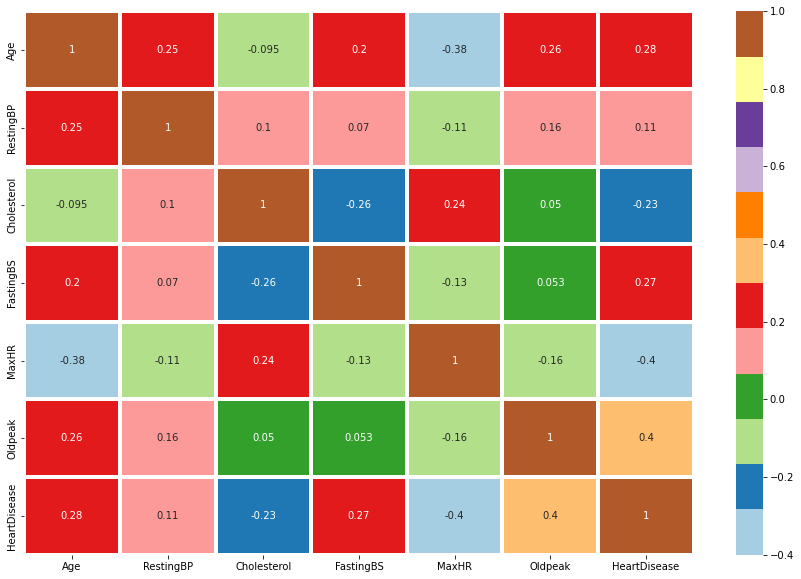

In [25]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot= True,cmap = "Paired",linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" )

# Visualization

# Frequency Distribution of HeartDisease

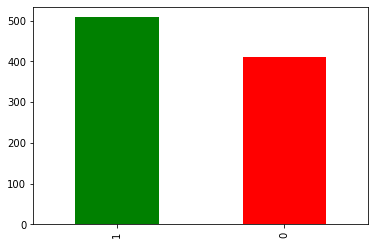

In [26]:
df["HeartDisease"].value_counts().plot(kind="bar", color=["Green", "Red"]);

## Compare HeartDisease column with sex column 

In [27]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

# Gender Vs HeartDisease

In [28]:
Gender_Vs_HeartDisease = pd.crosstab(index = df["Sex"],
                               columns = df["HeartDisease"],
                               margins= True,
                               normalize = "index") #Include Row and Column total

In [29]:
Gender_Vs_HeartDisease

HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724
All,0.446623,0.553377


- 45% people are not affacted by HeartDisease
- 55% people are affacted by HeartDisease

#### Create a plot of crosstab


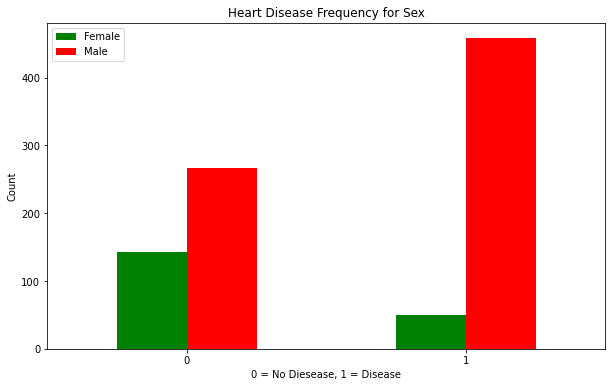

In [30]:
pd.crosstab(df.HeartDisease, df.Sex).plot(kind="bar",figsize=(10, 6),
                                    color=["Green", "Red"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

- The Proportion of Male for both the cases having HeartDisease and not having HeartDisease is more as comapre to Female.

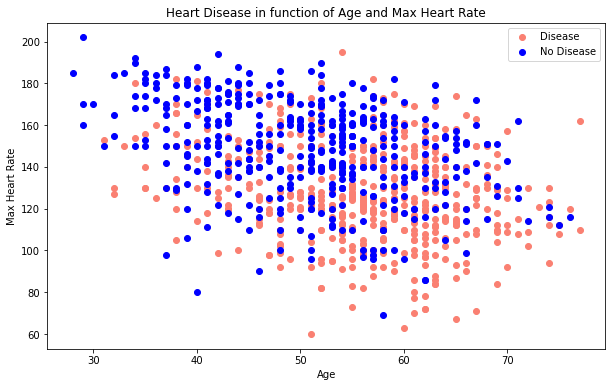

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot of a person having disease

plt.scatter(df.Age[df.HeartDisease==1],
            df.MaxHR[df.HeartDisease==1],
            c="Salmon")

# Scatter plot of a person not having disease

plt.scatter(df.Age[df.HeartDisease==0],
            df.MaxHR[df.HeartDisease==0],
            c="Blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

- People between age group 52 and  65 having more Heartrate and most of them having Heartdisease.

# Histogram.
## Distribution of Age 

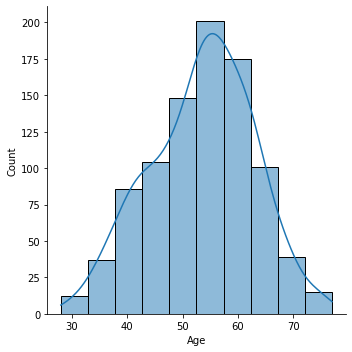

In [32]:
sns.displot(df["Age"], bins= 10, kde= True)

- People with Age 55-65 are high in frequancy

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

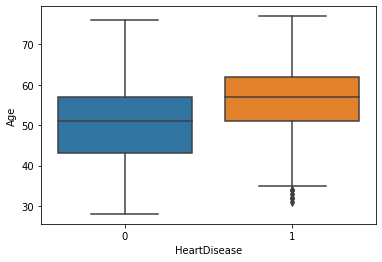

In [33]:
sns.boxplot("HeartDisease", "Age", data = df)

- People within age between 43 to 58 are not having any HeartDisease.
- People within age between 52 to 63 are having HeartDisease.

# Reindexing the Sex Column as 0 and 1 for Female and Male Respectively.

In [34]:
df['Sex'][df['Sex'] == 'F' ] = 0
df['Sex'][df['Sex'] == 'M' ] = 1

# Heart Disease Frequency per Chest Pain Type
- cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [35]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [36]:

df['ChestPainType'][df['ChestPainType'] == 'TA'] =  0
df['ChestPainType'][df['ChestPainType'] == 'ATA'] = 1
df['ChestPainType'][df['ChestPainType'] == 'NAP'] = 2
df['ChestPainType'][df['ChestPainType'] == 'ASY'] = 3

# Change FastingBS Integer to object data type

- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- '>126' mg/dL signals diabetes

In [37]:
df["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [38]:
'''

df['FastingBS'][df['FastingBS'] == 0] = 'lower than 120mg/ml'
df['FastingBS'][df['FastingBS'] == 1] = 'greater than 120mg/ml'

'''

"\n\ndf['FastingBS'][df['FastingBS'] == 0] = 'lower than 120mg/ml'\ndf['FastingBS'][df['FastingBS'] == 1] = 'greater than 120mg/ml'\n\n"

In [39]:
Gender_Vs_FastingBS = pd.crosstab(index = df["Sex"],
                               columns = df["FastingBS"],
                               margins= True,
                               normalize = "index") #Include Row and Column total

In [40]:
Gender_Vs_FastingBS

FastingBS,0,1
Sex,,
0,0.865285,0.134715
1,0.740690,0.259310
All,0.766885,0.233115


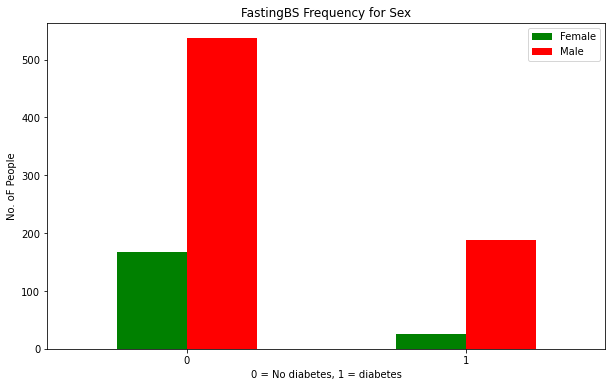

In [41]:
pd.crosstab(df.FastingBS, df.Sex).plot(kind="bar",figsize=(10, 6),
                                    color=["Green", "Red"])

plt.title("FastingBS Frequency for Sex")
plt.xlabel("0 = No diabetes, 1 = diabetes")
plt.ylabel("No. oF People")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

- 76% People having no diabetes where as 24% peope having diabetes.
- 76% Females not having diabetes where 14% Females having diabetes
- 75% Male not having diabetes where 25% Male having diabetes

# RestingECG

In [42]:
df['RestingECG'][df['RestingECG'] == "Normal"] = 0
df['RestingECG'][df['RestingECG'] == "ST"] = 1
df['RestingECG'][df['RestingECG'] == "LVH"] = 2

In [43]:
df["RestingECG"].value_counts()

0    552
2    188
1    178
Name: RestingECG, dtype: int64

In [44]:
HeartDisease_Vs_RestingECG = pd.crosstab(index = df["HeartDisease"],
                               columns = df["RestingECG"],
                               margins= True,
                               normalize = "index") #Include Row and Column total

In [45]:
HeartDisease_Vs_RestingECG

RestingECG,0,1,2
HeartDisease,,,
0,0.651220,0.148780,0.200000
1,0.561024,0.230315,0.208661
All,0.601307,0.193900,0.204793


- Percentage of people having Normal Ecg is 60%
- Percentage of people having Standard Ecg is 19% 
- Percentage of people having LVH Ecg is 21%

# ExerciseAngina

In [46]:
df['ExerciseAngina'][df['ExerciseAngina'] == "N"] = 0
df['ExerciseAngina'][df['ExerciseAngina'] == "Y"] = 1

# ST_Slope

In [47]:
df['ST_Slope'][df['ST_Slope'] == "Up"] = 1
df['ST_Slope'][df['ST_Slope'] == "Flat"] = 2
df['ST_Slope'][df['ST_Slope'] == "Down"] = 3

In [48]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [49]:
df1 = df

In [50]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,2,1
914,68,1,3,144,193,1,0,141,0,3.4,2,1
915,57,1,3,130,131,0,0,115,1,1.2,2,1
916,57,0,1,130,236,0,2,174,0,0.0,2,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


In [53]:
df1.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,0,110,264,0,0,132,0,1.2,2,1
914,68,1,3,144,193,1,0,141,0,3.4,2,1
915,57,1,3,130,131,0,0,115,1,1.2,2,1
916,57,0,1,130,236,0,2,174,0,0.0,2,1
917,38,1,2,138,175,0,0,173,0,0.0,1,0


In [54]:
df1.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

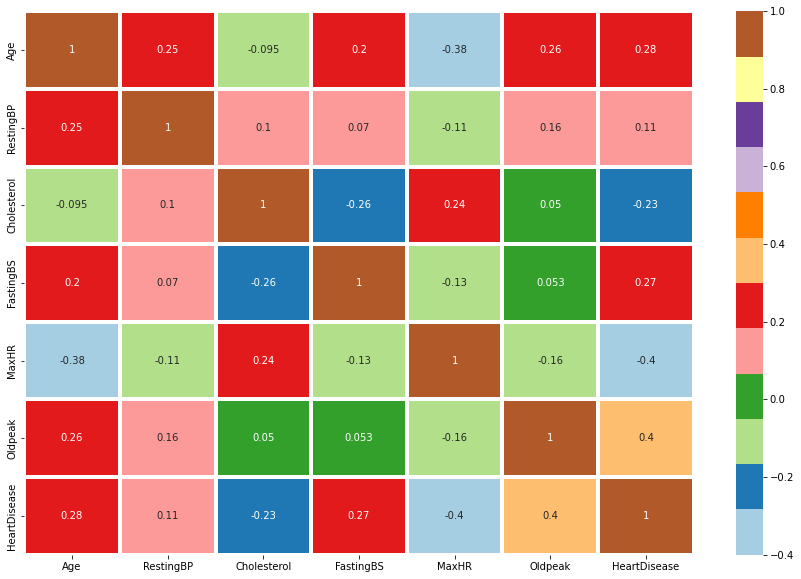

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), annot= True,cmap = "Paired",linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" )

# Visualization

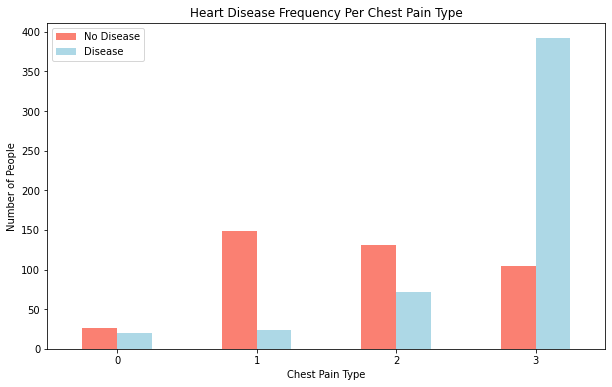

In [57]:
# Make the crosstab more visual
pd.crosstab(df1.ChestPainType, df1.HeartDisease).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of People")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

- People with 1st type of chest pain are least vulnerable to heartdisese.
- People with 3rd type of chest pain are more vulnerable to heartdisese.

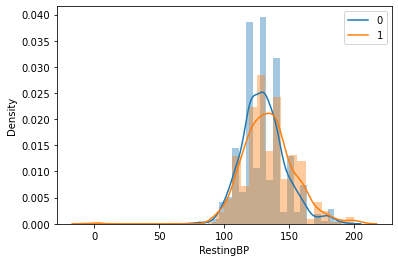

In [58]:
sns.distplot(df1.RestingBP[df1.HeartDisease==0])
sns.distplot(df1.RestingBP[df1.HeartDisease==1])
plt.legend(['0','1'])
plt.show()

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

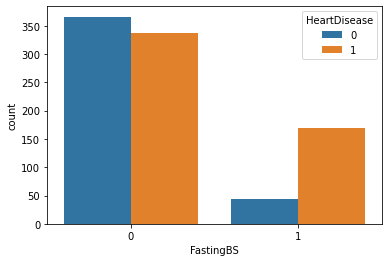

In [59]:
sns.countplot(x = "FastingBS", hue = "HeartDisease", data = df1)

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

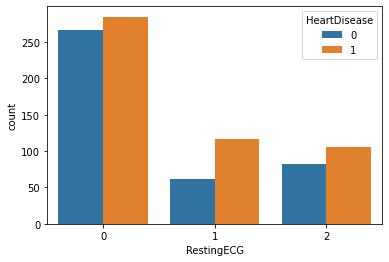

In [60]:
sns.countplot(x = "RestingECG", hue = "HeartDisease", data = df1)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

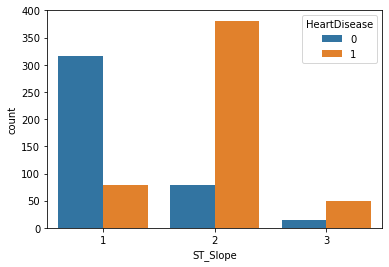

In [61]:
sns.countplot(x = "ST_Slope", hue = "HeartDisease", data = df1)

# Model Building

# Logistic Regression.
- It is a machine learning classification algoritm that is use to predict the probability of categorical dependent variable.
- Using Logistic regression we will build a classifier model based on avaialable data.

In [62]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,0,132,0,1.2,2,1
914,68,1,3,144,193,1,0,141,0,3.4,2,1
915,57,1,3,130,131,0,0,115,1,1.2,2,1
916,57,0,1,130,236,0,2,174,0,0.0,2,1


In [63]:
df1.to_csv("HeartDisease_Cleaned_data.csv")

# Storing the column name

In [64]:
col_list = list(df1.columns)

In [65]:
col_list

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

# Seprating the input variable from the data

In [66]:
input_variable = list(set(col_list)- set(["HeartDisease"]))

In [67]:
input_variable

['ChestPainType',
 'Age',
 'RestingBP',
 'RestingECG',
 'FastingBS',
 'Sex',
 'ST_Slope',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'Cholesterol']

In [68]:
len(input_variable)

11

# Storing the value of input variable

In [69]:
x = df[input_variable].values

In [70]:
x

array([[1, 40, 140, ..., 0, 0.0, 289],
       [2, 49, 160, ..., 0, 1.0, 180],
       [1, 37, 130, ..., 0, 0.0, 283],
       ...,
       [3, 57, 130, ..., 1, 1.2, 131],
       [1, 57, 130, ..., 0, 0.0, 236],
       [2, 38, 138, ..., 0, 0.0, 175]], dtype=object)

# Storing the output variable as y

In [71]:
y = df1["HeartDisease"].values

In [72]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
x.shape

(918, 11)

In [74]:
y.shape

(918,)

In [75]:
x.size

10098

In [76]:
y.size

918

# Spliting the data into train and test¶

In [77]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state=0)

In [78]:
train_x

array([[3, 32, 118, ..., 0, 0.0, 529],
       [2, 36, 112, ..., 0, 1.0, 340],
       [3, 51, 95, ..., 0, 2.2, 0],
       ...,
       [3, 57, 128, ..., 0, 0.0, 303],
       [3, 64, 134, ..., 1, 4.0, 273],
       [2, 47, 108, ..., 0, 0.0, 243]], dtype=object)

In [79]:
test_x 

array([[3, 55, 115, ..., 0, 0.1, 0],
       [3, 66, 120, ..., 0, 0.4, 302],
       [3, 51, 110, ..., 0, 0.0, 0],
       ...,
       [3, 61, 110, ..., 0, 1.4, 0],
       [3, 44, 120, ..., 1, 2.8, 169],
       [3, 38, 120, ..., 0, 0.0, 282]], dtype=object)

In [80]:
train_y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [81]:
test_y

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [82]:
from sklearn.linear_model import LogisticRegression # Library for Logistic Regression

logistic = LogisticRegression()

In [83]:
logistic.fit(train_x,train_y)

LogisticRegression()

In [84]:
logistic.coef_

array([[ 5.15588587e-01, -2.59161487e-02,  2.91741986e-04,
         1.45966727e-01,  1.17926440e+00,  9.63726900e-01,
         1.54690676e+00, -2.33337512e-02,  9.72921347e-01,
         4.43051214e-01, -1.91697766e-03]])

In [85]:
logistic.intercept_

array([-0.25678467])

In [86]:
prediction = logistic.predict(test_x)

In [87]:
prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [88]:
accuracy_score = accuracy_score(test_y, prediction)

In [89]:
accuracy_score

0.822463768115942

# Making prediction

In [90]:
print(test_y) 
y_predic = logistic.predict(test_x)
y_predic

[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1]


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

# Model Evaluation

In [91]:
logistic.predict_proba(x)

array([[0.94233858, 0.05766142],
       [0.71034835, 0.28965165],
       [0.69736448, 0.30263552],
       ...,
       [0.07739316, 0.92260684],
       [0.90947345, 0.09052655],
       [0.88408921, 0.11591079]])

## Confusion matrix

In [92]:
confusion_matrix(test_y,y_predic)

array([[ 87,  26],
       [ 23, 140]], dtype=int64)

In [93]:
## 227 / 276 = 0.822463768115942

In [94]:
# Put models in a dictionary
models = {"SVM": svm.SVC(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, train_x, test_x, train_y, test_y):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(train_x, train_y)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(test_x, test_y)
    return model_scores

In [95]:
model_scores = fit_and_score(models=models,
                             train_x = train_x,
                             test_x = test_x,
                             train_y = train_y,
                             test_y = test_y)

model_scores

{'SVM': 0.717391304347826,
 'KNN': 0.6920289855072463,
 'Random Forest': 0.8586956521739131}

# Model Comparison

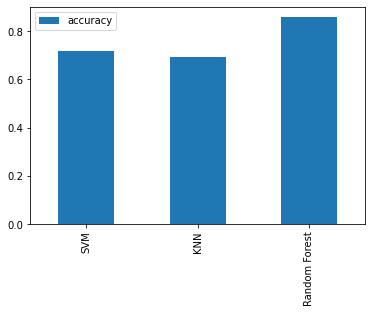

In [96]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning

In [97]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(train_x, train_y)
    
    # Update the training scores list
    train_scores.append(knn.score(train_x, train_y))
    
    # Update the test scores list
    test_scores.append(knn.score(test_x, test_y))

In [98]:
train_scores

[1.0,
 0.82398753894081,
 0.8146417445482866,
 0.778816199376947,
 0.7897196261682243,
 0.7725856697819314,
 0.7772585669781932,
 0.7819314641744548,
 0.764797507788162,
 0.7679127725856698,
 0.7601246105919003,
 0.7492211838006231,
 0.7429906542056075,
 0.7367601246105919,
 0.7445482866043613,
 0.7305295950155763,
 0.7429906542056075,
 0.7398753894080997,
 0.7414330218068536,
 0.735202492211838]

In [99]:
test_scores

[0.6702898550724637,
 0.644927536231884,
 0.6594202898550725,
 0.6702898550724637,
 0.6920289855072463,
 0.7065217391304348,
 0.7246376811594203,
 0.7101449275362319,
 0.7210144927536232,
 0.7137681159420289,
 0.7065217391304348,
 0.7065217391304348,
 0.7210144927536232,
 0.717391304347826,
 0.7210144927536232,
 0.7028985507246377,
 0.717391304347826,
 0.7101449275362319,
 0.7210144927536232,
 0.7065217391304348]

Maximum KNN score on the test data: 72.46%


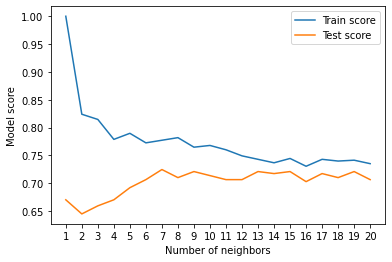

In [100]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV
- We're going to tune:

- LogisticRegression()
- RandomForestClassifier()

  - using RandomizedSearchCV

In [101]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [102]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(train_x, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [103]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [104]:
rs_log_reg.score(test_x, test_y)

0.8442028985507246

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [105]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(train_x, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [106]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [107]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(test_x, test_y)

0.855072463768116

# Hyperparamter Tuning with GridSearchCV
- Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [108]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(train_x, train_y);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [109]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [110]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(test_x, test_y)

0.8442028985507246

# Evaluting our tuned machine learning classifier, beyond accuracy
   - ROC curve and AUC score
   - Confusion matrix
   - Classification report
   - Precision
   - Recall
   - F1-score
     - and it would be great if cross-validation was used where possible.

# To make comparisons and evaluate our trained model, first we need to make predictions.

In [111]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(test_x)

In [112]:
y_preds

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [113]:
test_y

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

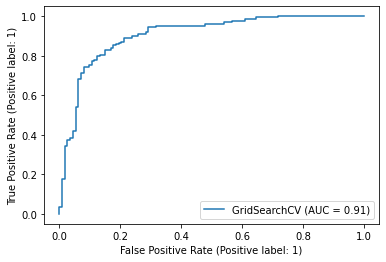

In [114]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, test_x, test_y)

In [115]:
# Confusion matrix
print(confusion_matrix(test_y, y_predic))

[[ 87  26]
 [ 23 140]]


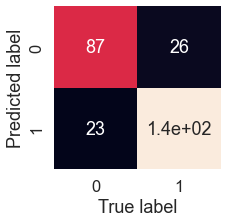

In [116]:
sns.set(font_scale=1.5)

def plot_conf_mat(test_y, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(test_y, y_predic),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(test_y, y_preds)


Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [117]:
print(classification_report(test_y, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       113
           1       0.86      0.88      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



# Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [118]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [119]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 9.236708571873866,
                         solver="liblinear")

In [120]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80434783, 0.82065217, 0.80434783, 0.84699454, 0.74863388])

In [121]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8049952482775007

In [122]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8464169980914384

In [123]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8070277615996894

In [124]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8179042238364271

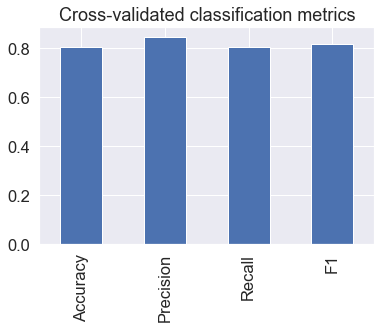

In [125]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Feature Importance

- Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

- Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

- Let's find the feature importance for our LogisticRegression model...

In [126]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C= 9.236708571873866,
                         solver="liblinear")

clf.fit(train_x, train_y);

In [127]:
# Check coef_
clf.coef_

array([[ 6.45476787e-01, -8.59135196e-03,  8.09711171e-03,
         1.60275402e-01,  1.25554295e+00,  1.20367077e+00,
         1.79614482e+00, -1.36616522e-02,  9.76113148e-01,
         3.60727587e-01, -1.73191253e-03]])

In [128]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0


In [129]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': 0.6454767868518625,
 'Sex': -0.00859135196054589,
 'ChestPainType': 0.008097111711507714,
 'RestingBP': 0.1602754022894858,
 'Cholesterol': 1.2555429513310115,
 'FastingBS': 1.2036707680075016,
 'RestingECG': 1.7961448234592576,
 'MaxHR': -0.013661652171626282,
 'ExerciseAngina': 0.9761131484300452,
 'Oldpeak': 0.36072758712390096,
 'ST_Slope': -0.0017319125347549274}

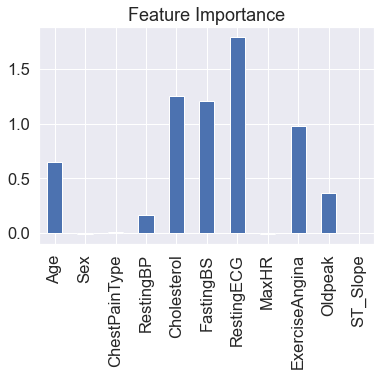

In [130]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [131]:
pd.crosstab(df["Sex"], df["HeartDisease"])

HeartDisease,0,1
Sex,,
0,143,50
1,267,458


In [132]:
pd.crosstab(df["ST_Slope"], df["HeartDisease"])

HeartDisease,0,1
ST_Slope,,
1,317,78
2,79,381
3,14,49
